In [ ]:

!pip install tensorflow-io[tensorflow]
import kagglehub
import os
import tensorflow as tf
import tensorflow_io as tfio
from IPython.display import Audio
#downloading the dataset
path = kagglehub.dataset_download("mmoreaux/environmental-sound-classification-50")

print("Path to dataset files:", path)

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/mmoreaux/environmental-sound-classification-50/versions/15"

# List all items in the directory (files and folders)
items = os.listdir(dataset_path)


print (items)

Path to dataset files: /root/.cache/kagglehub/datasets/mmoreaux/environmental-sound-classification-50/versions/15
['bc_utils.py', 'audio', 'utils.py', 'utils2.py', 'esc50.csv']


In [ ]:
dataset_path1 = "/root/.cache/kagglehub/datasets/mmoreaux/environmental-sound-classification-50/versions/15/audio/audio/44100"
items1= os.listdir(dataset_path1)
print(items1)



['2-109371-A-16.wav', '2-70366-A-33.wav', '4-173865-A-9.wav', '4-251645-A-49.wav', '1-54752-A-18.wav', '4-163697-A-13.wav', '5-177614-A-5.wav', '1-84536-A-39.wav', '5-156026-A-4.wav', '1-1791-A-26.wav', '3-172881-A-48.wav', '2-127108-A-38.wav', '1-73123-A-26.wav', '1-12654-B-15.wav', '4-181035-A-38.wav', '4-212604-A-15.wav', '1-17124-A-43.wav', '5-243036-A-29.wav', '1-27403-A-28.wav', '3-65748-A-12.wav', '2-135649-A-45.wav', '5-201274-A-21.wav', '4-152995-A-24.wav', '5-235874-A-28.wav', '2-110011-A-5.wav', '4-178402-A-43.wav', '4-264453-A-34.wav', '4-99193-A-4.wav', '2-109231-C-9.wav', '1-60997-A-20.wav', '2-91912-B-33.wav', '4-155670-A-26.wav', '3-157149-A-10.wav', '4-204121-A-39.wav', '2-117795-B-3.wav', '4-197871-A-15.wav', '2-52085-A-4.wav', '5-220026-A-21.wav', '2-70280-A-18.wav', '1-46272-A-12.wav', '3-100018-A-18.wav', '2-125875-A-13.wav', '3-118487-A-26.wav', '2-117615-B-48.wav', '1-27165-A-35.wav', '1-13613-A-37.wav', '5-208030-A-0.wav', '2-59241-A-35.wav', '2-60900-A-22.wav',

In [ ]:
# Check file types in the dataset directory
audio_files = [f for f in items1 if f.endswith(".wav")]
print(f"Total audio files: {len(audio_files)}")
print("Sample files:", audio_files[:5])  # Show first 5 files

Total audio files: 2000
Sample files: ['2-109371-A-16.wav', '2-70366-A-33.wav', '4-173865-A-9.wav', '4-251645-A-49.wav', '1-54752-A-18.wav']


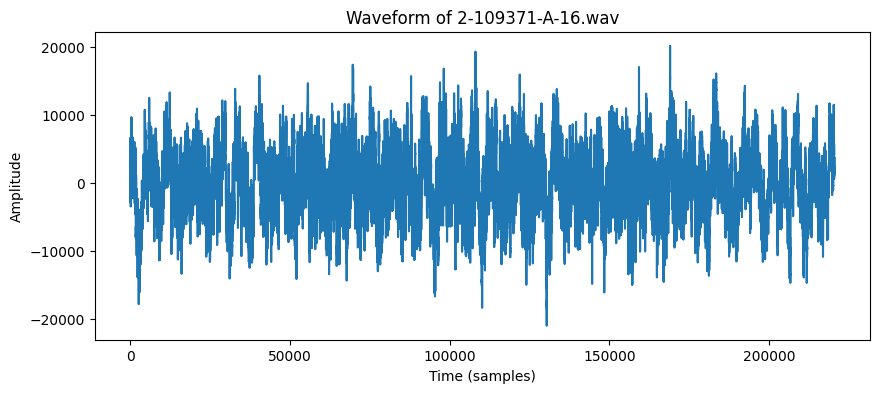

In [ ]:
import matplotlib.pyplot as plt

# Choose an example audio file
sample_audio_path = os.path.join(dataset_path1, audio_files[0])

# Load audio
audio = tfio.audio.AudioIOTensor(sample_audio_path)
audio_tensor = tf.squeeze(audio.to_tensor(), axis=-1)  # Convert to 1D tensor
sample_rate = audio.rate.numpy()  # Get sample rate

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_tensor.numpy())
plt.title(f"Waveform of {audio_files[0]}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# Play audio
Audio(sample_audio_path)


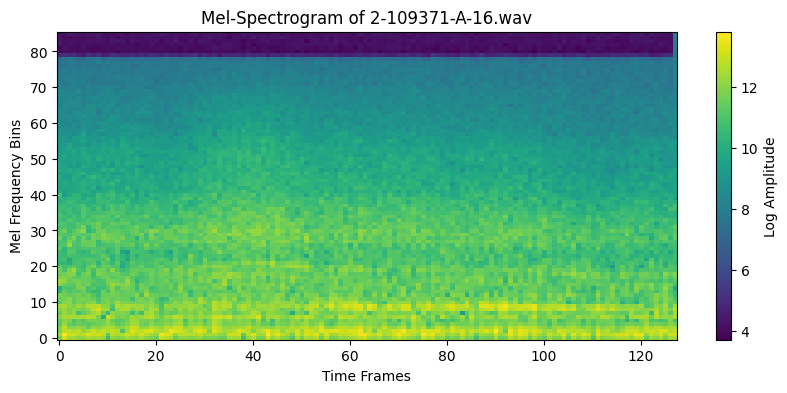

In [ ]:
# Convert raw waveform to Mel-Spectrogram
def get_mel_spectrogram(audio_tensor, sample_rate):
    audio_tensor = tf.cast(audio_tensor, tf.float32)
    spectrogram = tfio.audio.spectrogram(audio_tensor, nfft=1024, window=1024, stride=512)
    mel_spectrogram = tfio.audio.melscale(spectrogram, rate=sample_rate, mels=128, fmin=0, fmax=sample_rate//2)
    # Expand dimensions: (216, 128) → (216, 128, 1)
    mel_spectrogram = tf.expand_dims(mel_spectrogram, axis=-1)
    # Ensure the shape is (128, 86)
    mel_spectrogram = tf.image.resize(mel_spectrogram, (128, 86))
    return mel_spectrogram

# Compute and visualize the Mel-Spectrogram
mel_spec = get_mel_spectrogram(audio_tensor, sample_rate)

plt.figure(figsize=(10, 4))
plt.imshow(tf.math.log(mel_spec[:,:,0]).numpy().T, aspect='auto', origin='lower', cmap='viridis')
plt.title(f"Mel-Spectrogram of {audio_files[0]}")
plt.xlabel("Time Frames")
plt.ylabel("Mel Frequency Bins")
plt.colorbar(label="Log Amplitude")
plt.show()


In [ ]:
# data = load_esc50_data(dataset_path1)  # Re-run with corrected function

# # Print shape of first sample
# print(f"Fixed Mel-Spectrogram Shape: {data[0][0].shape}")

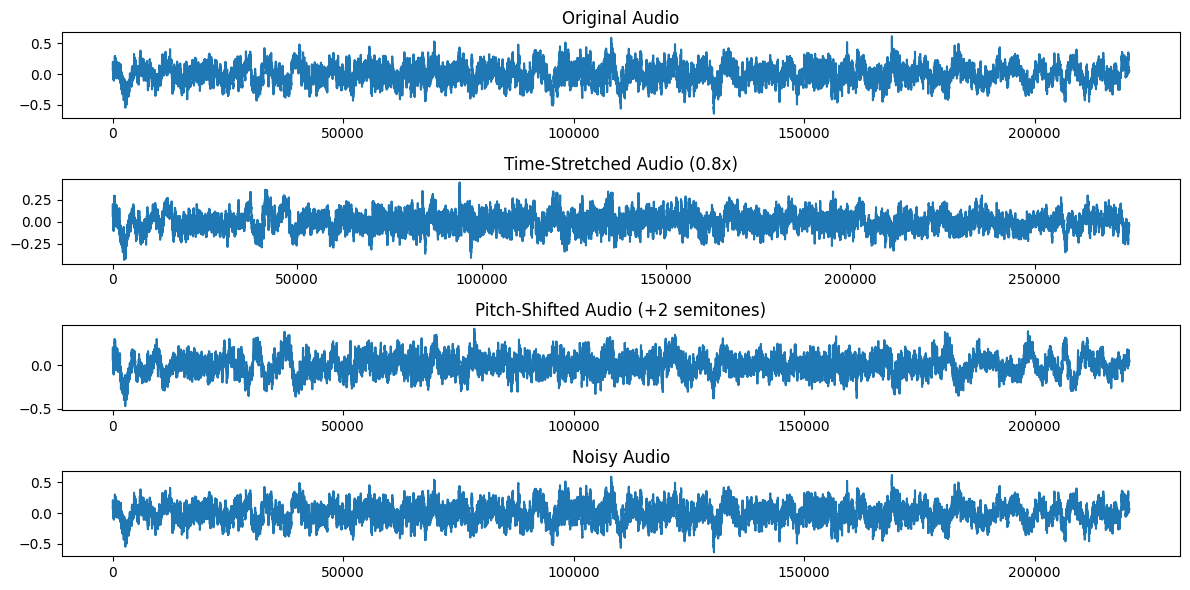

In [ ]:
import librosa
import librosa.display
import numpy as np

# Load an audio file
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)  # Keep original sample rate
    return audio, sr

# Time Stretching
def time_stretch(audio, rate=0.8):
    return librosa.effects.time_stretch(y= audio, rate= rate)

# Pitch Shifting
def pitch_shift(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr= sr, n_steps=n_steps)

# Add Background Noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Load sample audio
sample_audio, sample_rate = load_audio(sample_audio_path)

# Apply augmentations
stretched_only_audio = time_stretch(sample_audio, rate=0.8)
shifted_only_audio = pitch_shift(sample_audio, sample_rate, n_steps=2)
noisy_only_audio = add_noise(sample_audio)

# Plot original vs. augmented waveforms
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(sample_audio)
plt.title("Original Audio")

plt.subplot(4, 1, 2)
plt.plot(stretched_only_audio)
plt.title("Time-Stretched Audio (0.8x)")

plt.subplot(4, 1, 3)
plt.plot(shifted_only_audio)
plt.title("Pitch-Shifted Audio (+2 semitones)")

plt.subplot(4, 1, 4)
plt.plot(noisy_only_audio)
plt.title("Noisy Audio")

plt.tight_layout()
plt.show()


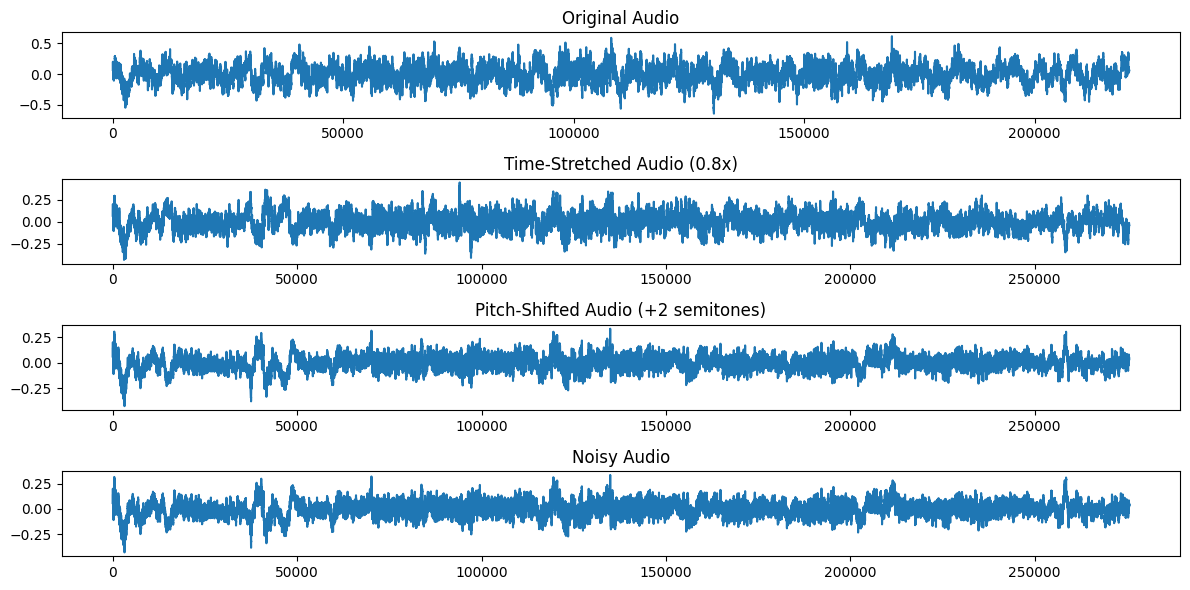

In [ ]:
# Apply augmentations(apply all techniques sequentially)
stretched_audio = time_stretch(sample_audio, rate=0.8)
shifted_audio = pitch_shift(stretched_audio, sample_rate, n_steps=2)
noisy_audio = add_noise(shifted_audio)

# Plot original vs. augmented waveforms
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(sample_audio)
plt.title("Original Audio")

plt.subplot(4, 1, 2)
plt.plot(stretched_audio)
plt.title("Time-Stretched Audio (0.8x)")

plt.subplot(4, 1, 3)
plt.plot(shifted_audio)
plt.title("Pitch-Shifted Audio (+2 semitones)")

plt.subplot(4, 1, 4)
plt.plot(noisy_audio)
plt.title("Noisy Audio")

plt.tight_layout()
plt.show()


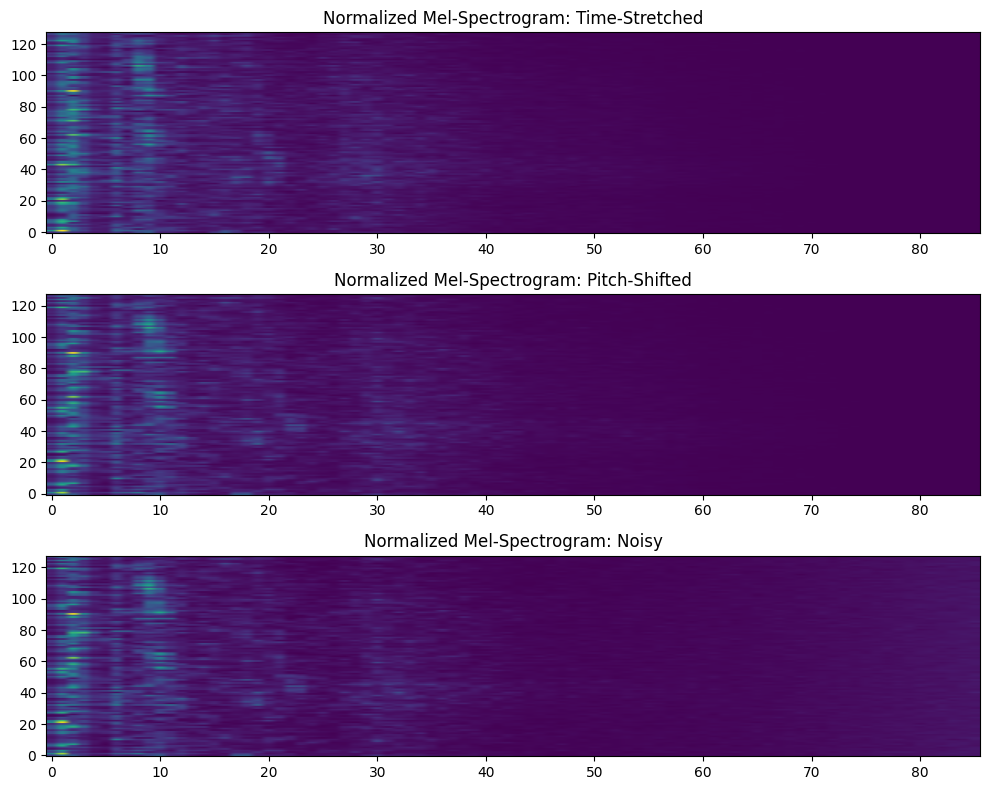

In [ ]:
# Normalize the Mel-Spectrogram
def normalize_spectrogram(mel_spec):
    mean = tf.math.reduce_mean(mel_spec)
    std = tf.math.reduce_std(mel_spec)
    return (mel_spec - mean) / std

# Compute the Mel-Spectrogram for augmented audio
mel_stretched = get_mel_spectrogram(tf.convert_to_tensor(stretched_audio, dtype=tf.float32), sample_rate)
mel_shifted = get_mel_spectrogram(tf.convert_to_tensor(shifted_audio, dtype=tf.float32), sample_rate)
mel_noisy = get_mel_spectrogram(tf.convert_to_tensor(noisy_audio, dtype=tf.float32), sample_rate)

# Normalize each spectrogram
mel_stretched_norm = normalize_spectrogram(mel_stretched)
mel_shifted_norm = normalize_spectrogram(mel_shifted)
mel_noisy_norm = normalize_spectrogram(mel_noisy)

# Plot the normalized Mel-Spectrograms
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for ax, mel, title in zip(axes, [mel_stretched_norm, mel_shifted_norm, mel_noisy_norm],
                          ["Time-Stretched", "Pitch-Shifted", "Noisy"]):
    ax.imshow(mel, aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f"Normalized Mel-Spectrogram: {title}")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

# Define CNN-based Feature Extractor
def build_cnn_feature_extractor(input_shape=(128, 86, 1)):
    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2,2))(x)

    # Block 2
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    # Block 3
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    # Residual Connection
    # Adjust the residual connection to match the shape of 'x'
    x_res = layers.Conv2D(128, (3,3), activation='relu', padding='same')(inputs)
    x_res = layers.MaxPooling2D((2,2))(x_res)
    x_res = layers.MaxPooling2D((2,2))(x_res)
    x_res = layers.MaxPooling2D((2,2))(x_res)


    x = layers.Add()([x, x_res])  # Adding residual connection

    # Flatten before attention modules
    x = layers.Flatten()(x)

    return models.Model(inputs, x, name="CNN_Feature_Extractor")

# Create the CNN model
cnn_model = build_cnn_feature_extractor()
cnn_model.summary()


Model: "CNN_Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25            │ (None, 128, 86, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 128, 86, 32)    │            320 │ input_layer_25[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_81          │ (None, 64, 43, 32)     │              0 │ conv2d_56[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 64, 43, 64)     │         18,496 │ max_pooling2d_81[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 128, 86, 128)   │          1,280 │ input_layer_25[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_82          │ (None, 32, 21, 64)     │              0 │ conv2d_57[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_84          │ (None, 64, 43, 128)    │              0 │ conv2d_59[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 32, 21, 128)    │         73,856 │ max_pooling2d_82[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_85          │ (None, 32, 21, 128)    │              0 │ max_pooling2d_84[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_83          │ (None, 16, 10, 128)    │              0 │ conv2d_58[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_86          │ (None, 16, 10, 128)    │              0 │ max_pooling2d_85[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_21 (Add)              │ (None, 16, 10, 128)    │              0 │ max_pooling2d_83[0][0… │
│                           │                        │                │ max_pooling2d_86[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_13 (Flatten)      │ (None, 20480)          │              0 │ add_21[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 93,952 (367.00 KB)

 Trainable params: 93,952 (367.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow.keras.backend as K

# Channel-Wise Attention (Spatial Attention)
def channel_wise_attention(inputs):
    # Global Average Pooling across time
    avg_pool = layers.GlobalAveragePooling2D()(inputs)
    # Get shape of avg_pool using tf.shape
    # shape = tf.shape(avg_pool)
    shape = K.int_shape(avg_pool)

    # Fully Connected Layers for Excitation
    dense1 = layers.Dense(shape[-1] // 8, activation="relu")(avg_pool)
    dense2 = layers.Dense(shape[-1], activation="sigmoid")(dense1)

    # Reshape and multiply with input
    attention = layers.Reshape((1, 1, shape[-1]))(dense2)
    return layers.Multiply()([inputs, attention])

# Temporal Self-Attention using Transformer-style mechanism
def temporal_self_attention_new(inputs):
    # Flatten over frequency axis to get time-sequence vectors
    seq = layers.Permute((2, 1, 3))(inputs)  # Swap axes (time, freq, channels)
    seq = layers.Reshape((K.int_shape(seq)[1], -1))(seq)  # Shape: (time_steps, features)

    # Multi-Head Self-Attention
    attention_out = layers.MultiHeadAttention(num_heads=4, key_dim=128)(seq, seq)

    # Add & Norm
    out = layers.Add()([seq, attention_out])
    out = layers.LayerNormalization()(out)

    return layers.GlobalAveragePooling1D()(out)  # Pool across time

# Build the DAADN Model
def build_daacoustic_model_new(input_shape=(128, 86, 1), num_classes=50):
    inputs = layers.Input(shape=input_shape)

    # CNN Feature Extractor
    x = build_cnn_feature_extractor()(inputs)

    # Reshape back to feature maps (16, 10, 128)
    x = layers.Reshape((16, 10, 128))(x)

    # Apply Channel-Wise Attention
    x = channel_wise_attention(x)

    # Apply Temporal Self-Attention
    x = temporal_self_attention_new(x)

    # Classification Head
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return models.Model(inputs, outputs, name="DAADN_Model")

# Create Model
daadn_model = build_daacoustic_model_new()
daadn_model.summary()


Model: "DAADN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30            │ (None, 128, 86, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ CNN_Feature_Extractor     │ (None, 20480)          │         93,952 │ input_layer_30[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_31 (Reshape)      │ (None, 16, 10, 128)    │              0 │ CNN_Feature_Extractor… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ reshape_31[0][0]       │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 16)             │          2,064 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 128)            │          2,176 │ dense_36[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_32 (Reshape)      │ (None, 1, 1, 128)      │              0 │ dense_37[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_9 (Multiply)     │ (None, 16, 10, 128)    │              0 │ reshape_31[0][0],      │
│                           │                        │                │ reshape_32[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_9 (Permute)       │ (None, 10, 16, 128)    │              0 │ multiply_9[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_33 (Reshape)      │ (None, 10, 2048)       │              0 │ permute_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 10, 2048)       │      4,197,888 │ reshape_33[0][0],      │
│ (MultiHeadAttention)      │                        │                │ reshape_33[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_27 (Add)              │ (None, 10, 2048)       │              0 │ reshape_33[0][0],      │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 10, 2048)       │          4,096 │ add_27[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 2048)           │              0 │ layer_normalization_9… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 64)             │        131,136 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout) 

 Total params: 4,434,562 (16.92 MB)

 Trainable params: 4,434,562 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Load audio files and labels
def load_esc50_data(dataset_path):
    audio_files = [f for f in os.listdir(dataset_path) if f.endswith(".wav")]
    labels = [int(f.split("-")[0]) for f in audio_files]  # Extract class from filename

    data = []
    for file in audio_files:
        try:
            file_path = os.path.join(dataset_path, file)
            audio, sr = librosa.load(file_path, sr=22050)
            mel_spec = get_mel_spectrogram(tf.convert_to_tensor(audio, dtype=tf.float32), sr)
            mel_spec_norm = normalize_spectrogram(mel_spec)
            label = int(file.split("-")[0])  # Extract class label
            if 0 <= label < 50:  # Check if label is in valid range
                data.append((mel_spec_norm, label))
            else:
                print(f"Skipping file '{file}' with invalid label: {label}")
        except ValueError:
            print(f"Skipping file '{file}' due to error in label extraction")

    return data

# Load dataset
data_1 = load_esc50_data(dataset_path1)

# Number of folds
num_folds = 5

# Initialize KFold
kf1 = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store accuracy scores
fold_accuracies = []

# Convert dataset to numpy arrays
X = np.array([item[0] for item in data_1])
y = np.array([item[1] for item in data_1])


In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf1.split(X)):
    print(f"\nTraining Fold {fold+1}/{num_folds}...")

    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to TensorFlow datasets
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(1000)
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

    # Reinitialize Model (fresh start for each fold)
    model = build_daacoustic_model_new()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # Train Model
    history = model.fit(train_ds, validation_data=val_ds, epochs=50,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])

    # Evaluate on Validation Set
    val_loss, val_accuracy = model.evaluate(val_ds)
    fold_accuracies.append(val_accuracy)
    print(f"Fold {fold+1} Accuracy: {val_accuracy:.4f}")

# Compute Average Accuracy Across Folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage K-Fold Accuracy: {average_accuracy:.4f}")



Training Fold 1/5...
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.1170 - loss: 3.3171 - val_accuracy: 0.1975 - val_loss: 2.2023
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1631 - loss: 2.8603 - val_accuracy: 0.2100 - val_loss: 2.1803
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1895 - loss: 2.7064 - val_accuracy: 0.1775 - val_loss: 2.0462
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.1921 - loss: 2.5589 - val_accuracy: 0.1675 - val_loss: 1.9754
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.1947 - loss: 2.5233 - val_accuracy: 0.1825 - val_loss: 1.9124
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2107 - loss: 2.4624 - val_accuracy: 0.1800 - val_loss: 1.9311
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.2248 - loss: 2.3389 - val_accuracy: 0.1825 - val_loss: 1.8025
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2143 - loss: 2.3199 - va

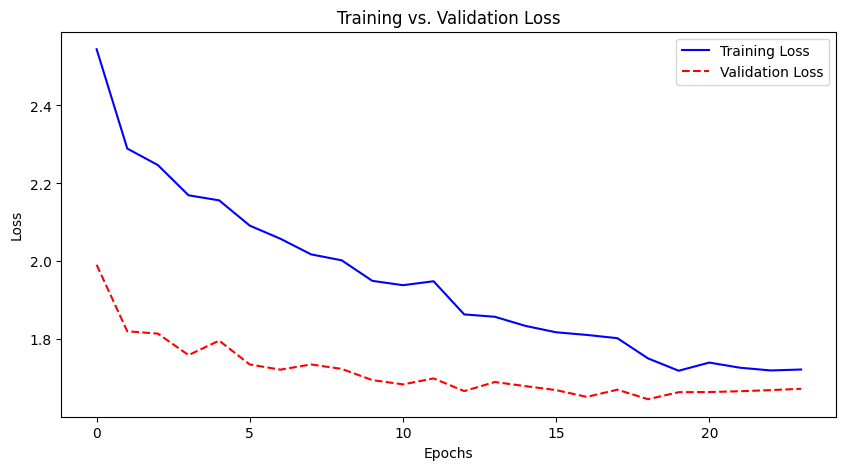

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red", linestyle="dashed")
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



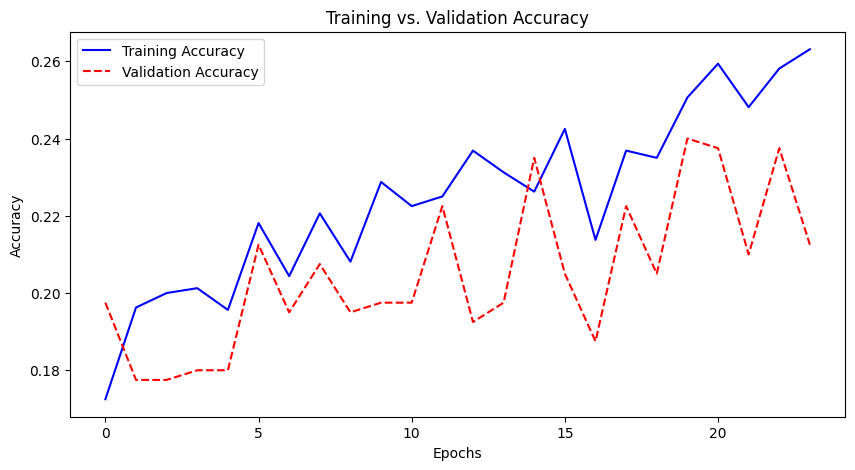

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red", linestyle="dashed")
plt.title("Training vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()